In [0]:
%tensorflow_version 1.x

TensorFlow 1.x selected.


In [0]:
from __future__ import print_function
import keras
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D, BatchNormalization
import os
# augmentation = 증강
# 즉, 컴퓨터가 이미지의 일반적인 특징을 파악할 수 있도록 이미지에 여러 변화를 주어 학습시키는것

Using TensorFlow backend.


In [0]:
from google.colab import auth
auth.authenticate_user()

from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
cd gdrive/My Drive/Colab Notebooks/models

/content/gdrive/My Drive/Colab Notebooks/models


In [0]:
# Hyper parameter 
batch_size = 16
num_classes = 10
epochs = 25

In [0]:
# The data, split between train and test sets:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170500096/170498071 [==============================] - 4s 0us/step


In [0]:
print('x_train shape:', x_train.shape)
# x_train.shape -> (50000, 32, 32, 3)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


In [0]:
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [0]:
# 1. y_train -> to_categorical -> categorical dataset -> Loss: categorical_crossentropy
# Last dense layer: 10

# 2. y_train -> Loss: sparse_categorical_crossentropy
# Last dense layer:10

y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [0]:
# One-hot-encoding
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [0]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

In [0]:
print('Using real-time data augmentation.')
    # This will do preprocessing and realtime data augmentation:
datagen = ImageDataGenerator(
    featurewise_center=False,  # set input mean to 0 over the dataset
    # 평균값 삽입
    samplewise_center=False,  # set each sample mean to 0
    # 
    featurewise_std_normalization=False,  # divide inputs by std of the dataset
    samplewise_std_normalization=False,  # divide each input by its std
    zca_whitening=False,  # apply ZCA whitening
    zca_epsilon=1e-06,  # epsilon for ZCA whitening
    rotation_range=60,  # randomly rotate images in the range (degrees, 0 to 180)
    # randomly shift images horizontally (fraction of total width)
    width_shift_range=0.1, # x축 비율 변경
    # randomly shift images vertically (fraction of total height)
    height_shift_range=0.3,
    shear_range=0.,  # set range for random shear 이미지 늘리기
    zoom_range=1.5,  # set range for random zoom
    channel_shift_range=0.,  # set range for random channel shifts
    # set mode for filling points outside the input boundaries
    fill_mode='nearest',
    cval=0.,  # value used for fill_mode = "constant"
    horizontal_flip=True,  # randomly flip images x축기준으로 반전
    vertical_flip=True,  # randomly flip images y축 기준으로 반전
    # set rescaling factor (applied before any other transformation)
    rescale=None,
    # set function that will be applied on each input
    preprocessing_function=None,
    # image data format, either "channels_first" or "channels_last"
    data_format=None,
    # fraction of images reserved for validation (strictly between 0 and 1)
    validation_split=0.0)

# Compute quantities required for feature-wise normalization
# (std, mean, and principal components if ZCA whitening is applied).
datagen.fit(x_train)

Using real-time data augmentation.


In [0]:
filepath = "./cifar10-model-{epoch:02d}-{val_accuracy:.2f}.hdf5"
checkpoint = keras.callbacks.ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max') # mode 늘어나는값 표기
#                                                                출력할 함수   학습 진행 상황 표기  accuracy가 높아졌을때만 저장 

네트워크를 직접 설계해 보세요!

In [0]:
# for example,
n_kernels = 4
model = Sequential()


Instructions for updating:
If using Keras pass *_constraint arguments to layers.



In [0]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 64)        18496     
_________________________________________________________________
batch_normalization_1 (Batch (None, 28, 28, 64)        256       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 12, 12, 64)        36928     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 10, 10, 128)       73856     
_________________________________________________________________
batch_normalization_2 (Batch (None, 10, 10, 128)      

In [0]:
opt = keras.optimizers.rmsprop(lr=0.0001, decay=1e-6)

In [0]:
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

In [0]:
# Let's train the model using RMSprop
# fit 과 fit_generator 차이
# fit = keras에 가장 쉽제 이용되는 학습방법 - 데이터를 통째로 집어넣음(배치사이즈 등을 알아서 계산)
# fir_generate batch size등의 커스터마이즈할때(램사이즈에 맞게 배치사이즈를 조정해주고 1epioh을 정의해주어서 전체 데이터를 세팅 할때)
history = model.fit_generator(datagen.flow(x_train, y_train, #flow 데이터의 정보를 넘겨줌
                                     batch_size=batch_size),
                        epochs=epochs,
                        validation_data=(x_test, y_test),
                        workers=4, callbacks=[checkpoint])

Epoch 1/25
3125/3125 [==============================] - 52s 17ms/step - loss: 1.9414 - accuracy: 0.2916 - val_loss: 1.8417 - val_accuracy: 0.3498

Epoch 00001: val_accuracy improved from -inf to 0.34980, saving model to ./cifar10-model-01-0.35.hdf5
Epoch 2/25
3125/3125 [==============================] - 52s 17ms/step - loss: 1.8936 - accuracy: 0.3063 - val_loss: 1.7215 - val_accuracy: 0.3746

Epoch 00002: val_accuracy improved from 0.34980 to 0.37460, saving model to ./cifar10-model-02-0.37.hdf5
Epoch 3/25
3125/3125 [==============================] - 52s 17ms/step - loss: 1.8669 - accuracy: 0.3184 - val_loss: 1.6910 - val_accuracy: 0.4016

Epoch 00003: val_accuracy improved from 0.37460 to 0.40160, saving model to ./cifar10-model-03-0.40.hdf5
Epoch 4/25
3125/3125 [==============================] - 52s 17ms/step - loss: 1.8422 - accuracy: 0.3313 - val_loss: 1.6599 - val_accuracy: 0.4037

Epoch 00004: val_accuracy improved from 0.40160 to 0.40370, saving model to ./cifar10-model-04-0.40.

In [0]:
epochs_range = range(25)
validation_accuracy = history.history['val_accuracy']
training_accuracy = history.history['accuracy']

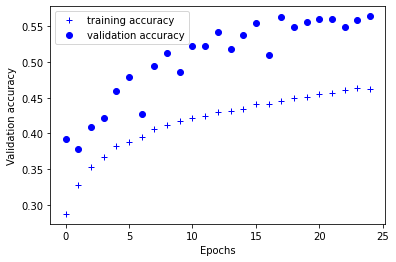

In [0]:
import matplotlib.pyplot as plt

plt.plot(epochs_range, training_accuracy, 'b+', label='training accuracy')
# ‘bo’는 파란색 점을 의미합니다
plt.plot(epochs_range, validation_accuracy, 'bo', label='validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Validation accuracy')
plt.legend()

plt.show()

In [0]:
scores = model.evaluate(x_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

10000/10000 [==============================] - 2s 206us/step
Test loss: 0.9792179574489593
Test accuracy: 0.7587
